In [1]:
# import liabraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt , seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## import dataset

In [2]:
df = pd.read_csv(r"AutoData (1).csv")
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

# Perform data cleanup as required

In [5]:
df.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
# dataset does not contain any missing value

### EDA

In [7]:
numerical_features = ['curbweight','enginesize','horsepower','peakrpm','citympg','highwaympg','carwidth','price']

In [8]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


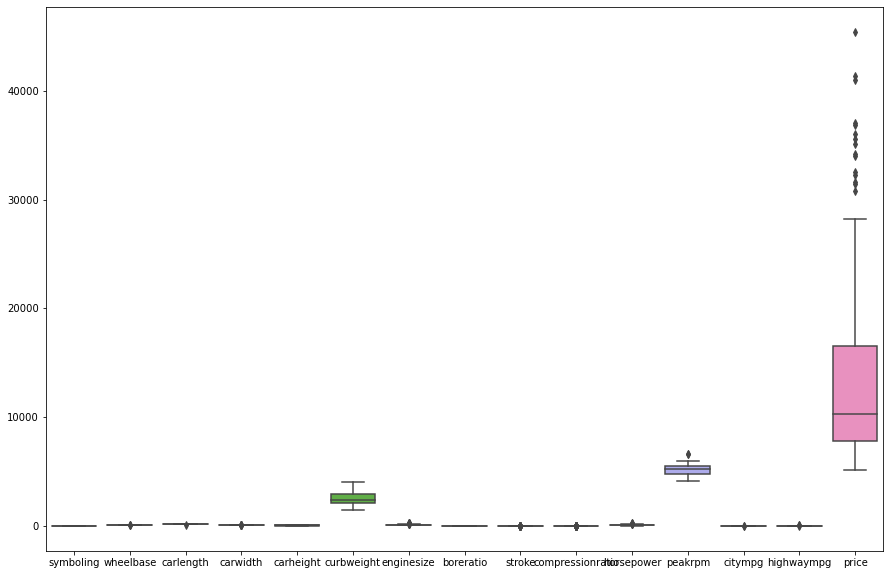

In [9]:
plt.figure(figsize=(15,10))
sns.boxplot(data= df)
plt.show()

In [10]:
# By, Ploting boxplot we can see there is exist Outliers in most of the features and high in Price

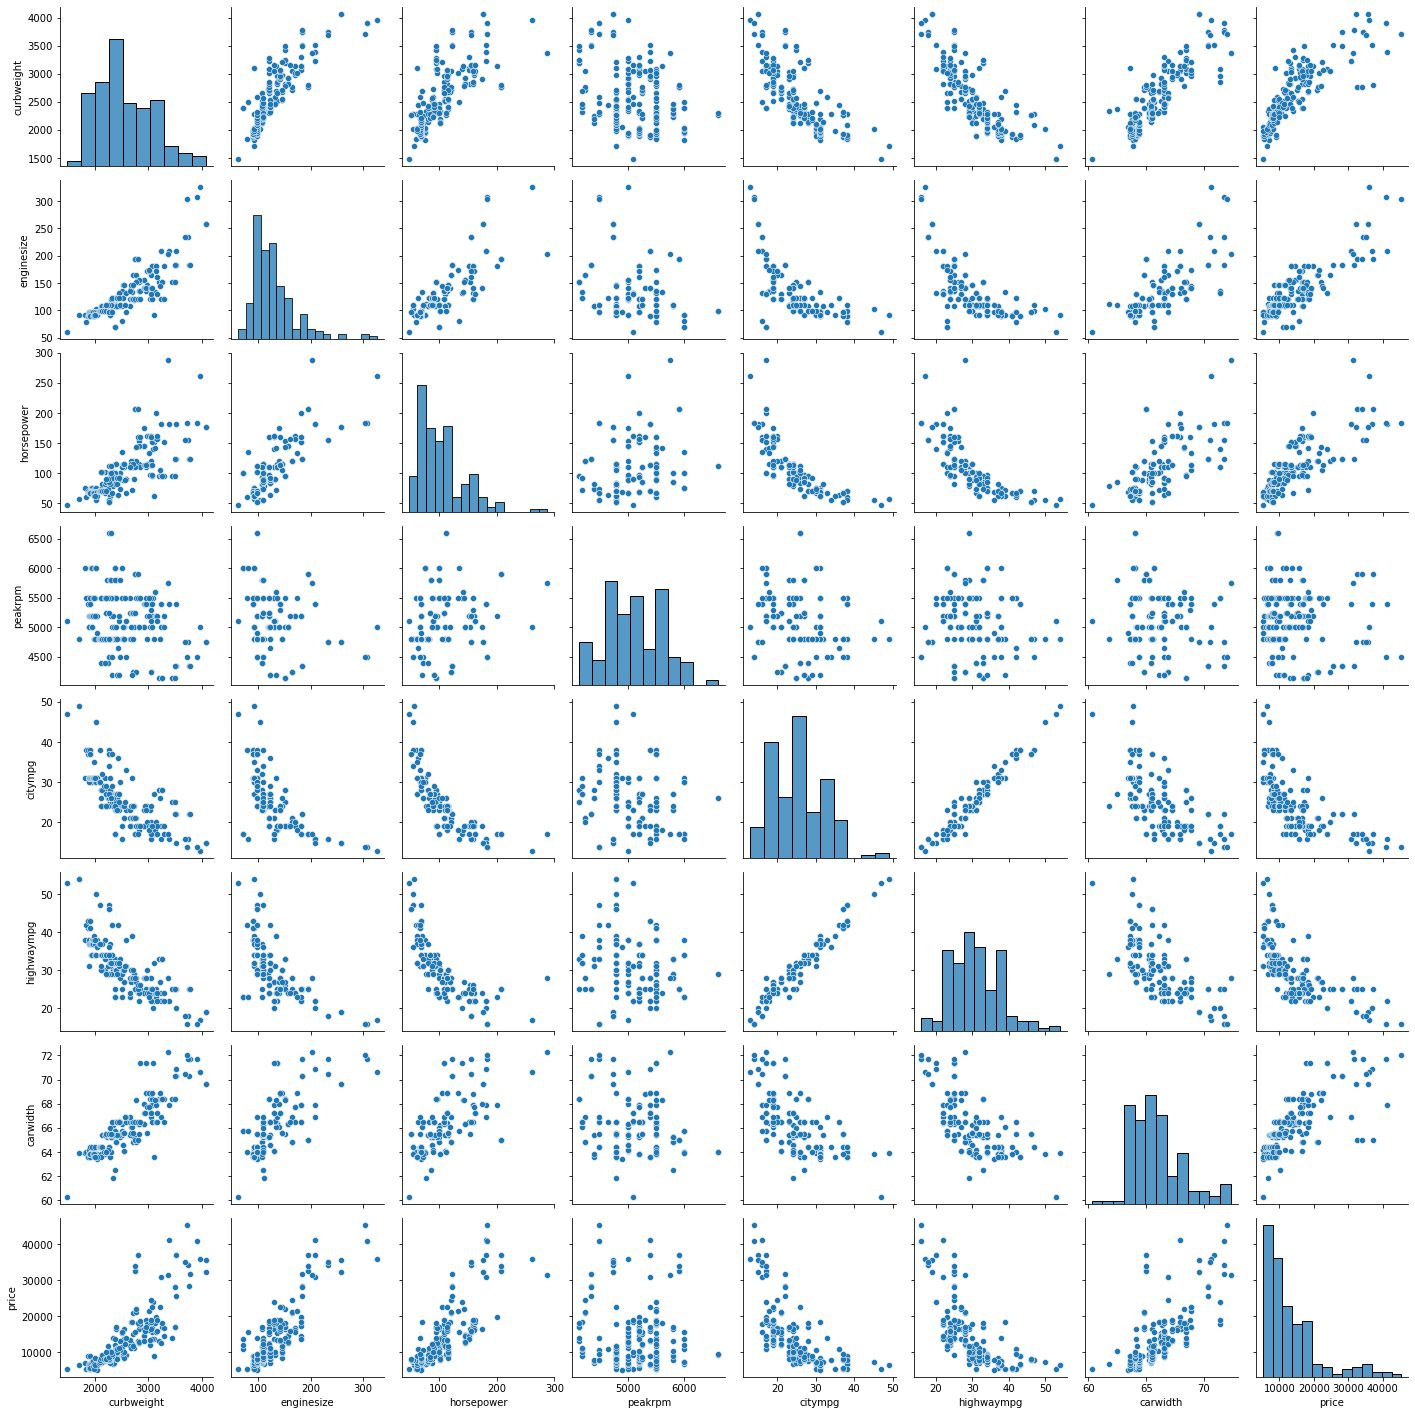

In [11]:
sns.pairplot(df[numerical_features]);

In [12]:
# After Making the analysis, we get to know that ENGINESIZE is most correlated feature To price.
# So, we take enginesize as the dependent feature for simple linear Regression.

In [13]:
x = df.iloc[:, [15]]
y = df.iloc[:, [24]]

In [14]:
print(x.head())
print(y.head())

   enginesize
0         130
1         130
2         152
3         109
4         136
     price
0  13495.0
1  16500.0
2  16500.0
3  13950.0
4  17450.0


### Perform train test split

In [15]:
# splitting the variables as training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size =0.3, random_state = 100)

In [16]:
x_train

,enginesize
122,98
125,151
166,98
1,130
199,130
...,...
87,110
103,181
67,183
24,90


In [17]:
y_train

,price
122,7609.0
125,22018.0
166,9538.0
1,16500.0
199,18950.0
...,...
87,9279.0
103,13499.0
67,25552.0
24,6229.0


In [18]:
import statsmodels.api as sm

# adding a constant
x_train_sm = sm.add_constant(x_train)

In [19]:
# fitting the regression line using OLS
lr = sm.OLS(y_train, x_train_sm).fit()

lr.params

const        -7607.862243
enginesize     165.369185
dtype: float64

In [20]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           1.09e-44
Time:                        11:19:17   Log-Likelihood:                -1384.0
No. Observations:                 143   AIC:                             2772.
Df Residuals:                     141   BIC:                             2778.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7607.8622   1047.770     -7.261      0.0

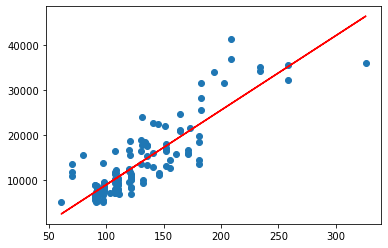

In [21]:
# visulizing the regression line 
plt.scatter(x_train, y_train)
plt.plot(x_train,-7607.8622+165.3692*x_train, 'r' )
plt.show()

In [22]:
# residual analysis

In [23]:
y_train = y_train['price'].tolist()
print(y_train)

[7609.0, 22018.0, 9538.0, 16500.0, 18950.0, 9980.0, 7499.0, 11248.0, 15750.0, 7999.0, 6229.0, 18150.0, 13645.0, 8916.5, 6918.0, 6989.0, 34028.0, 6338.0, 22625.0, 16430.0, 6575.0, 11199.0, 12629.0, 20970.0, 41315.0, 16558.0, 7099.0, 5499.0, 8916.5, 8358.0, 17950.0, 11595.0, 13845.0, 8013.0, 6095.0, 9988.0, 8845.0, 8058.0, 7895.0, 17710.0, 7395.0, 6692.0, 5572.0, 35550.0, 17859.167, 7957.0, 7295.0, 16900.0, 5195.0, 10245.0, 11259.0, 7463.0, 6295.0, 12940.0, 10945.0, 7775.0, 6377.0, 10345.0, 14399.0, 8195.0, 6529.0, 5389.0, 7957.0, 15998.0, 17075.0, 7799.0, 14489.0, 15985.0, 7898.0, 34184.0, 15250.0, 7295.0, 6785.0, 9258.0, 7975.0, 7053.0, 31600.0, 9895.0, 11694.0, 5348.0, 13495.0, 6669.0, 11549.0, 28248.0, 12290.0, 6488.0, 6479.0, 18399.0, 21105.0, 35056.0, 36880.0, 5151.0, 9095.0, 12440.0, 32250.0, 16695.0, 11845.0, 8558.0, 10795.0, 10198.0, 19699.0, 6692.0, 16500.0, 9959.0, 13295.0, 10595.0, 36000.0, 15510.0, 21485.0, 6649.0, 17450.0, 9549.0, 7126.0, 31400.5, 7788.0, 11850.0, 13200.0, 

In [24]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)   

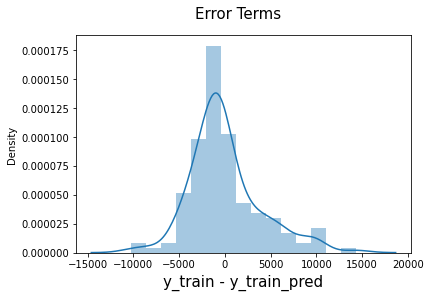

In [25]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

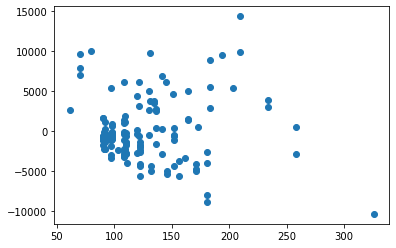

In [26]:
plt.scatter(x_train,res)
plt.show()

### since the residuals follow a normal distribution and do not follow any specific pattern, we can use the linear regression model we have built to evluate test data

In [27]:
# adding a constant to x_test
x_test_sm = sm.add_constant(x_test)

# predicting the y values corresponding to x_test_sm
y_test_pred = lr.predict(x_test_sm)

y_test_pred

160     8598.317892
186    10417.378928
59     12567.178334
165     8598.317892
140    10252.009743
           ...     
28     12567.178334
29     18189.730626
182     8432.948707
40     10582.748113
128    24473.759658
Length: 62, dtype: float64

In [28]:
# importing r2_score
from sklearn.metrics import r2_score

# checking the r-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7835830184011543

### the r-squared value by using the above code = 0.783
### training data r-squared value is = 0.753

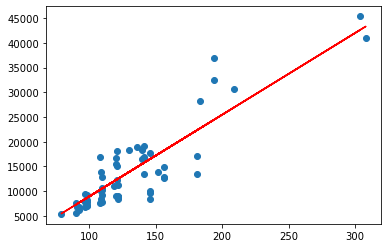

In [29]:
#visualize the line on the test set
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r')
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error
# Looking at RMSE
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_test_pred))

3893.004710750721

In [31]:
r_squared

0.7835830184011543

### in simple linear regression r_squared is 78%

## Make a multiple regression model

### In Multiple Linear Regression, we have choosen the feature by applying feature selection method heatmap, and  choose three features which can impact much on price.

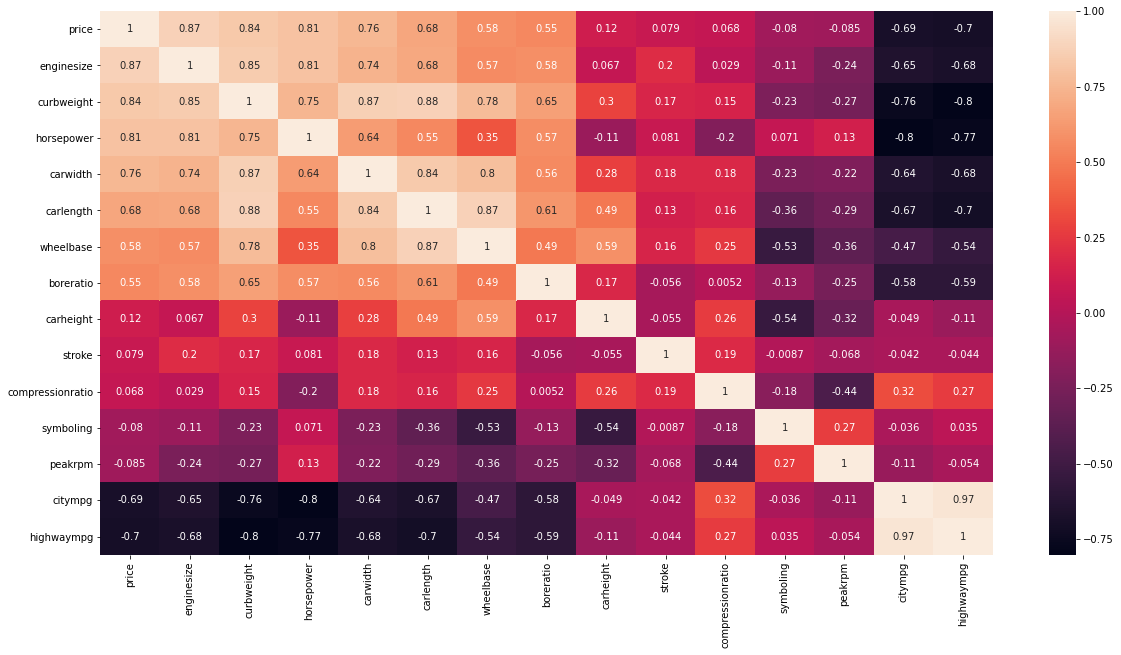

In [32]:
k = 25 #number of variables for heatmap
cols = df.corr().nlargest(k, 'price')['price'].index
heat = df[cols].corr()
plt.figure(figsize=(20,10))
sns.heatmap(heat, annot=True)
plt.show()

### THROUGH THIS WE GET TO KNOW ENGINESIZE,CURBWEIGHT,HORSEPOWER, ARE DEPENDENT VARIABLES ON PRICE. SHOWING POSITIVE CORRELATION

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['enginesize','curbweight','horsepower']]
vif_data= pd.DataFrame()
vif_data["features"] = X.columns
                
vif_data["VIF"] = [variance_inflation_factor(X.values,i)
                  for i in range(len(X.columns))]
 
print(vif_data)    

     features        VIF
0  enginesize  45.355066
1  curbweight  32.747473
2  horsepower  23.807775


In [34]:
X1 = df[['enginesize','curbweight','horsepower']]
Y1 = df[['price']]

In [35]:
X1

,enginesize,curbweight,horsepower
0,130,2548,111
1,130,2548,111
2,152,2823,154
3,109,2337,102
4,136,2824,115
...,...,...,...
200,141,2952,114
201,141,3049,160
202,173,3012,134
203,145,3217,106


In [36]:
Y1

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [37]:
from sklearn.model_selection import train_test_split
X_train1, X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,train_size=0.7,test_size =0.3, random_state = 100)

In [38]:
X_train1

,enginesize,curbweight,horsepower
122,98,2191,68
125,151,2778,143
166,98,2300,112
1,130,2548,111
199,130,3157,162
...,...,...,...
87,110,2403,116
103,181,3060,152
67,183,3515,123
24,90,1967,68


In [39]:
Y_train1

,price
122,7609.0
125,22018.0
166,9538.0
1,16500.0
199,18950.0
...,...
87,9279.0
103,13499.0
67,25552.0
24,6229.0


In [40]:
X = df[['enginesize','curbweight']]
Y = df['price']

In [41]:
from sklearn.model_selection import train_test_split
X_train1, X_test1,Y_train1,Y_test1 = train_test_split(X,Y,train_size=0.7,test_size =0.3, random_state = 100)

In [42]:
import statsmodels.api as sm

In [43]:
# Add a constant to get an intercept
X_train1_sm = sm.add_constant(X_train1)

# Fit the resgression line using 'OLS'
lr1 = sm.OLS(Y_train1, X_train1_sm).fit()

X_train1_sm

,const,enginesize,curbweight
122,1.0,98,2191
125,1.0,151,2778
166,1.0,98,2300
1,1.0,130,2548
199,1.0,130,3157
...,...,...,...
87,1.0,110,2403
103,1.0,181,3060
67,1.0,183,3515
24,1.0,90,1967


In [44]:
lr1.params

const        -14581.893823
enginesize       92.631854
curbweight        6.325292
dtype: float64

In [45]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           5.31e-50
Time:                        11:19:29   Log-Likelihood:                -1368.2
No. Observations:                 143   AIC:                             2742.
Df Residuals:                     140   BIC:                             2751.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.458e+04   1512.688     -9.640      0.0

In [46]:
X = df[['enginesize','curbweight','horsepower']]
Y = df[['price']]

In [47]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [48]:
# Add a constant to get an intercept
X_train1_sm = sm.add_constant(X_train1)

# Fit the resgression line using 'OLS'
lr1 = sm.OLS(Y_train1, X_train1_sm).fit()

X_train1_sm

,const,enginesize,curbweight,horsepower
122,1.0,98,2191,68
125,1.0,151,2778,143
166,1.0,98,2300,112
1,1.0,130,2548,111
199,1.0,130,3157,162
...,...,...,...,...
87,1.0,110,2403,116
103,1.0,181,3060,152
67,1.0,183,3515,123
24,1.0,90,1967,68


In [49]:
lr1.params

const        -13987.824296
enginesize       64.790042
curbweight        5.644993
horsepower       44.978111
dtype: float64

In [50]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           2.16e-51
Time:                        11:19:30   Log-Likelihood:                -1361.9
No. Observations:                 143   AIC:                             2732.
Df Residuals:                     139   BIC:                             2744.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.399e+04   1461.720     -9.569      0.0

In [51]:
Y_train1 = Y_train1['price'].tolist()
print(Y_train1)

[7609.0, 22018.0, 9538.0, 16500.0, 18950.0, 9980.0, 7499.0, 11248.0, 15750.0, 7999.0, 6229.0, 18150.0, 13645.0, 8916.5, 6918.0, 6989.0, 34028.0, 6338.0, 22625.0, 16430.0, 6575.0, 11199.0, 12629.0, 20970.0, 41315.0, 16558.0, 7099.0, 5499.0, 8916.5, 8358.0, 17950.0, 11595.0, 13845.0, 8013.0, 6095.0, 9988.0, 8845.0, 8058.0, 7895.0, 17710.0, 7395.0, 6692.0, 5572.0, 35550.0, 17859.167, 7957.0, 7295.0, 16900.0, 5195.0, 10245.0, 11259.0, 7463.0, 6295.0, 12940.0, 10945.0, 7775.0, 6377.0, 10345.0, 14399.0, 8195.0, 6529.0, 5389.0, 7957.0, 15998.0, 17075.0, 7799.0, 14489.0, 15985.0, 7898.0, 34184.0, 15250.0, 7295.0, 6785.0, 9258.0, 7975.0, 7053.0, 31600.0, 9895.0, 11694.0, 5348.0, 13495.0, 6669.0, 11549.0, 28248.0, 12290.0, 6488.0, 6479.0, 18399.0, 21105.0, 35056.0, 36880.0, 5151.0, 9095.0, 12440.0, 32250.0, 16695.0, 11845.0, 8558.0, 10795.0, 10198.0, 19699.0, 6692.0, 16500.0, 9959.0, 13295.0, 10595.0, 36000.0, 15510.0, 21485.0, 6649.0, 17450.0, 9549.0, 7126.0, 31400.5, 7788.0, 11850.0, 13200.0, 

In [52]:
Y_train_pred1 = lr1.predict(X_train1_sm)
res1 = (Y_train1 - Y_train_pred1)

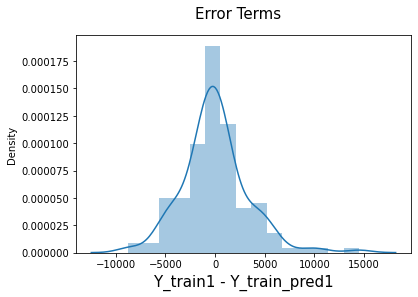

In [53]:
fig = plt.figure()
sns.distplot(res1, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Y_train1 - Y_train_pred1', fontsize = 15)         # X-label
plt.show()

In [55]:
# adding a constant to x_test
X_test1_sm = sm.add_constant(X_test1)

# predicting the y values corresponding to x_test_sm
Y_test_pred1 = lr1.predict(X_test1_sm)

Y_test_pred1

160     7330.683362
186     9739.789261
59     11158.030950
165    10185.057864
140     8937.687124
           ...     
28     12184.692373
29     18509.324261
182     7399.001184
40     10397.121754
128    23697.893827
Length: 62, dtype: float64

In [56]:
# importing r2_score
from sklearn.metrics import r2_score

# checking the r-squared value
r_squared1 = r2_score(Y_test1, Y_test_pred1)
r_squared1

0.7901639529778954

In [57]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(Y_test1, Y_test_pred1))

3833.3573764674998

# Conclusion, In the simple linear regression with the most correlated featue price has improred it trend and accuracy,which we can see as Line.


# This has resulted in R-squared = 78% in the model

# In Multiple Linear Regression, we have choosen the feature by applying feature selection method heatmap,
# and choose three features which can impact much on price.

# That has resulted in 79% accuracy.

# So, Multiple Linear Regression has improved the perfomance of the model, 
# accuracy of predicting the Price in comparison with its correlated Features.